In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score ,KFold
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor


In [15]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingClassifier,BaggingRegressor
from sklearn.linear_model import Ridge, Lasso , ElasticNet
from sklearn.svm import SVR,SVC


In [3]:
import os
os.chdir(r'C:\Users\dbda-lab\Desktop\pml\11 Practical Machine Learning\Datasets')
import pandas as pd

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
con=pd.read_csv("Concrete_Data.csv")
con

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
x= con.drop('Strength', axis=1)
y = con['Strength']
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [30]:
%%time
kfold=KFold(n_splits=5,shuffle=True,random_state=2023)
bagging=BaggingRegressor(random_state=2023,n_estimators=15)   #n_estimators : No of Y
# print(bagging.get_params())
lr=LogisticRegression()
lasso = Lasso()
ridge=Ridge()
elastic=ElasticNet()
dtc=DecisionTreeRegressor(random_state=2023)
# svm_l=SVR(probability=True,random_state=2023,kernel='Linear')
# svm_r=SVR(probability=True,random_state=2023,kernel='rbf')

params={'estimator':[lr,lasso,ridge,dtc,elastic]}  # for lasso ridge, elasticnet we dont ned to pass alpha values 
# is will tooke default valeus 

gcv=GridSearchCV(bagging, param_grid=params ,cv=kfold, scoring='r2',n_jobs=-1)  # n_jobs=-1 for parallel processing
gcv.fit(x,y)

print("BEST_ESTIMATOR",gcv.best_params_)
print('bEST_SCORE',gcv.best_score_)
pd.DataFrame(gcv.cv_results_)



BEST_ESTIMATOR {'estimator': DecisionTreeRegressor(random_state=2023)}
bEST_SCORE 0.9036012614317809
Wall time: 427 ms


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006796,0.002226,0.000000,0.000000,LogisticRegression(),{'estimator': LogisticRegression()},NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,0.046373,0.002244,0.003398,0.000489,Lasso(),{'estimator': Lasso()},0.600795,0.585143,0.620386,0.662514,0.567309,0.607229,0.032718,4
2,0.036379,0.004584,0.003398,0.000490,Ridge(),{'estimator': Ridge()},0.600378,0.588610,0.618323,0.662260,0.567077,0.607329,0.032116,3
3,0.086351,0.001743,0.003998,0.000632,DecisionTreeRegressor(random_state=2023),{'estimator': DecisionTreeRegressor(random_sta...,0.926029,0.900564,0.909468,0.904639,0.877306,0.903601,0.015742,1
4,0.043375,0.000490,0.003598,0.000800,ElasticNet(),{'estimator': ElasticNet()},0.600705,0.586603,0.619689,0.662456,0.567214,0.607333,0.032479,2


In [29]:
bagging.get_params() # To get all parameter which are allowed for baggging

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 15,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2023,
 'verbose': 0,
 'warm_start': False}

## Insurance

In [33]:
ins=pd.read_csv('insurance.csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [34]:
dum_ins=pd.get_dummies(ins,drop_first=True)
dum_ins

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [35]:
x=dum_ins.drop('charges',axis=1)
y=dum_ins['charges']

In [38]:
%%time
kfold=KFold(n_splits=5,shuffle=True,random_state=2023)
bagging=BaggingRegressor(random_state=2023,n_estimators=15)   #n_estimators : No of Y
# print(bagging.get_params())
lr=LogisticRegression()
lasso = Lasso()
ridge=Ridge()
elastic=ElasticNet()
dtc=DecisionTreeRegressor(random_state=2023)
# svm_l=SVR(probability=True,random_state=2023,kernel='Linear')
# svm_r=SVR(probability=True,random_state=2023,kernel='rbf')

params={'estimator':[lr,lasso,ridge,dtc,elastic]}  # for lasso ridge, elasticnet we dont ned to pass alpha values 
# is will tooke default valeus 

gcv=GridSearchCV(bagging, param_grid=params ,cv=kfold, scoring='r2',n_jobs=-1)  # n_jobs=-1 for parallel processing
gcv.fit(x,y)

print("BEST_ESTIMATOR",gcv.best_params_)
print('bEST_SCORE',gcv.best_score_)
pd.DataFrame(gcv.cv_results_)


BEST_ESTIMATOR {'estimator': DecisionTreeRegressor(random_state=2023)}
bEST_SCORE 0.8260218062342357
Wall time: 374 ms


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005197,0.000747,0.000000,0.000000e+00,LogisticRegression(),{'estimator': LogisticRegression()},NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,0.041776,0.003309,0.003997,3.234067e-07,Lasso(),{'estimator': Lasso()},0.754571,0.752958,0.719632,0.774285,0.737193,0.747728,0.018329,2
2,0.036379,0.002244,0.003398,4.895900e-04,Ridge(),{'estimator': Ridge()},0.754821,0.752877,0.719948,0.774040,0.736867,0.747711,0.018215,3
3,0.074557,0.003380,0.003998,3.814697e-07,DecisionTreeRegressor(random_state=2023),{'estimator': DecisionTreeRegressor(random_sta...,0.823737,0.831799,0.837844,0.836123,0.800606,0.826022,0.013611,1
4,0.037179,0.000748,0.002998,3.873843e-07,ElasticNet(),{'estimator': ElasticNet()},0.366842,0.405246,0.378535,0.415905,0.363589,0.386024,0.020927,4


# ---------------------------------------------------------------------------------------


# **                                           RANDOM FOREST **

In [40]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [41]:
ins=pd.read_csv('insurance.csv')
ins

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14
131,132,1,78,0.26,0.07,0.12,0.17,0.00,0.01,0.01,...,0.05,0.04,0.07,0.10,5.44,1.84,1.40,0.05,0.08,0.12


In [44]:
dum_ins=pd.get_dummies(ins,drop_first=True)
dum_ins

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [45]:
x=dum_ins.drop('charges',axis=1)
y=dum_ins['charges']

In [48]:
kfold = KFold(n_splits=5 , shuffle=True , random_state=2023)
rf = RandomForestRegressor(random_state= 2023)
params = {'max_features':[3,4,5,6,7],
         'n_estimators':[25,50,75]}
gcv = GridSearchCV(rf, param_grid=params, cv = kfold, scoring='r2')
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)


{'max_features': 3, 'n_estimators': 75}
0.8431254834503787


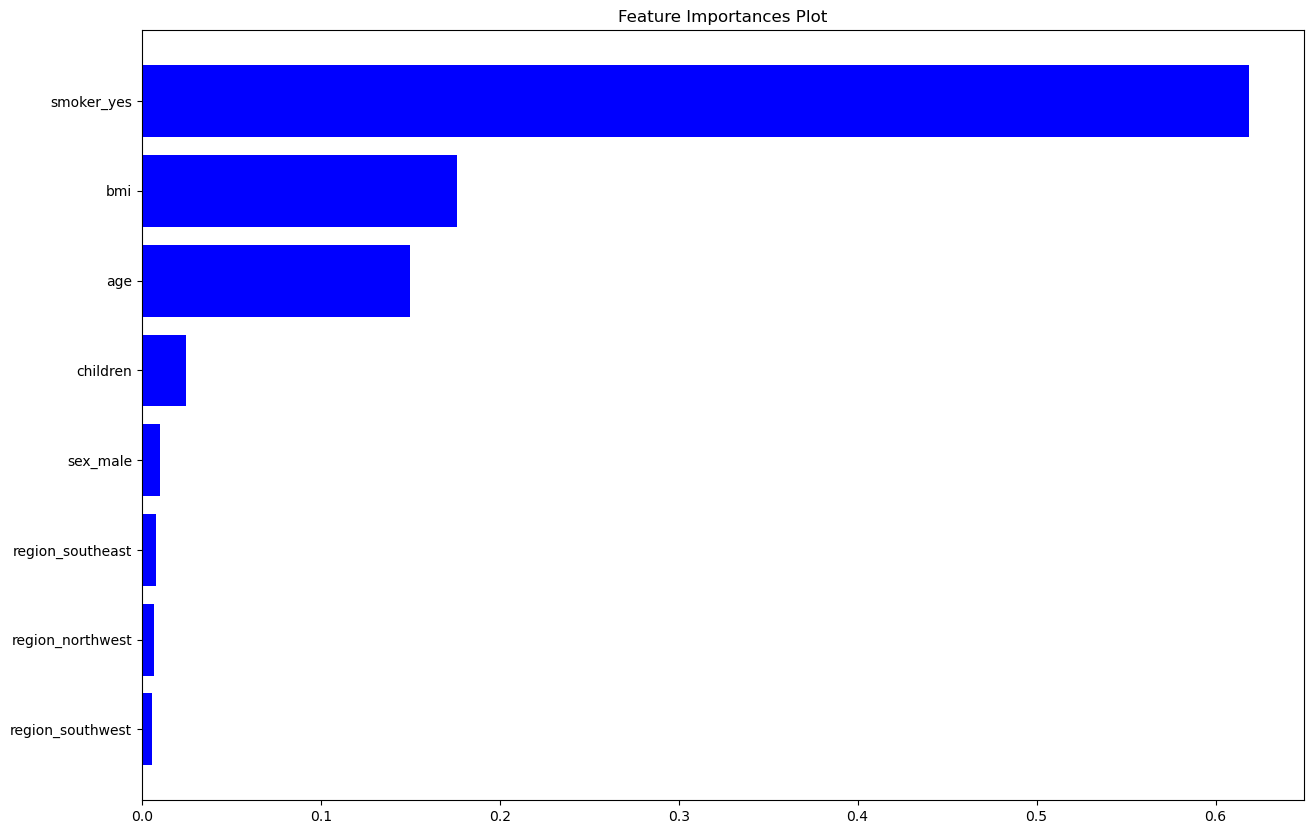

In [54]:
# To find Best features: (Feature=Column)
best_model = gcv.best_estimator_
imps =best_model.feature_importances_
s_index=np.argsort(imps)
cols=x.columns
sorted_imps =imps[s_index]
sorted_x=cols[s_index]
plt.figure(figsize=(15,10))
plt.barh(sorted_x,sorted_imps,color='b')
plt.title("Feature Importances Plot")
plt.show()

#  Gradient Boosting & HistGradientBoosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor ,HistGradientBoostingRegressor

In [59]:
con=pd.read_csv("Concrete_Data.csv")
con

,Cement,Blast,Fly,Water,Superplasticizer,Coarse,Fine,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [60]:
x= con.drop('Strength', axis=1)
y = con['Strength']
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [64]:
gc = GradientBoostingRegressor(random_state=2023)
params = {'learning_rate': [0.1,0.15,0.3,0.35,0.4,0.5],'n_estimators':[20,50,75], 'max_depth':[2,3,4,5]}
kfold = KFold(n_splits=5, shuffle=True, random_state=2023)
gcv = GridSearchCV(gc, param_grid=params, cv = kfold, scoring='r2',n_jobs=-1)
gcv.fit(x,y)
print('BEST_PARAMETER',gcv.best_params_)
print('BEST_SCORE',gcv.best_score_)

# n_estimators : No of Trees/No of Bootsrap


BEST_PARAMETER {'learning_rate': 0.35, 'max_depth': 5, 'n_estimators': 75}
BEST_SCORE 0.9284804703418346


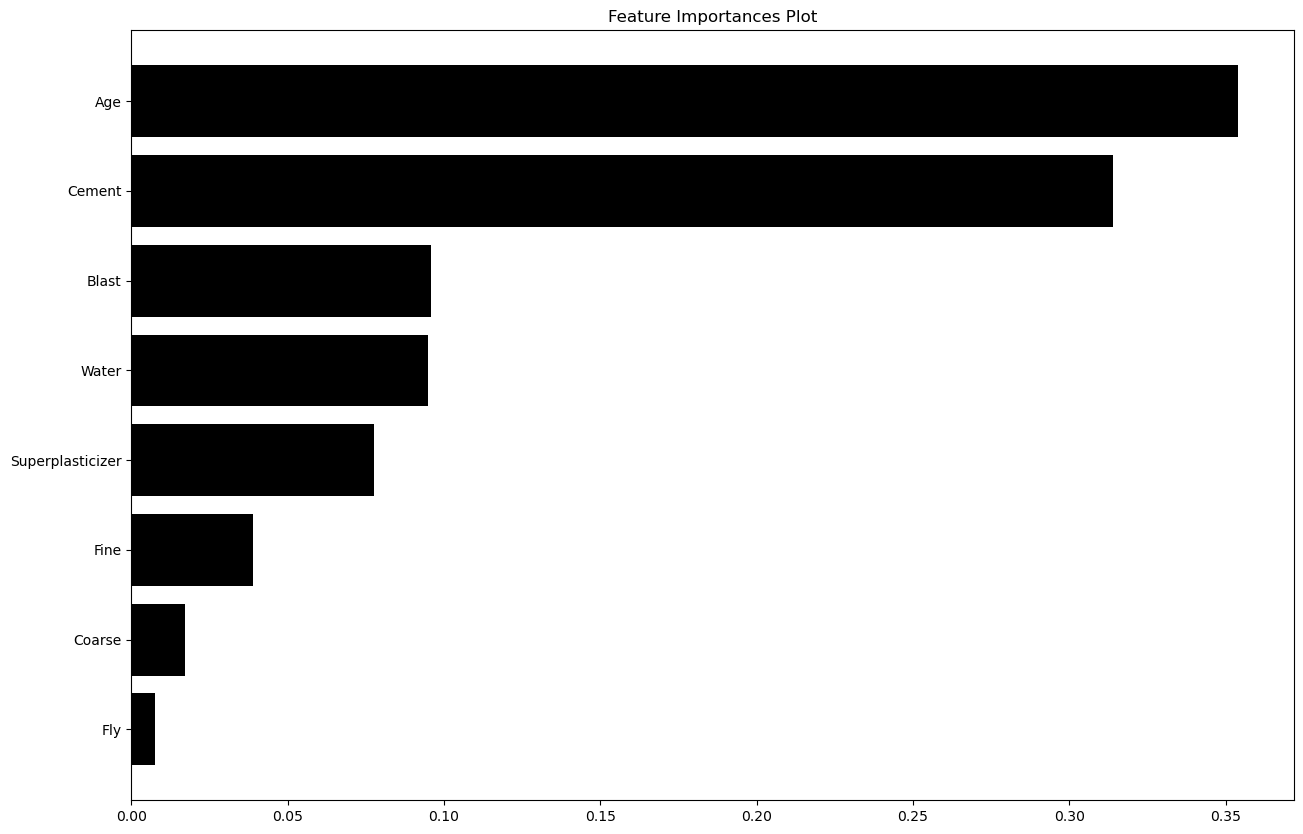

In [66]:
# To find Best features:(Feature=Column)BETS FEATURE MEANS IT IS MORE FLACTUTING TOWARDS THE Y VARIBLE
best_model = gcv.best_estimator_
imps =best_model.feature_importances_
s_index=np.argsort(imps)
cols=x.columns
sorted_imps =imps[s_index]
sorted_x=cols[s_index]
plt.figure(figsize=(15,10))
plt.barh(sorted_x,sorted_imps,color='k')
plt.title("Feature Importances Plot")
plt.show()

In [69]:
# Using Hist Gradient Regressor : Basically it same like gradient 

gc = HistGradientBoostingRegressor(random_state=2023)
params = {'learning_rate': [0.1,0.15,0.3,0.35,0.4,0.5],'max_iter':[20,50,75], 'max_depth':[2,3,4,5]}
kfold =KFold(n_splits=5, shuffle=True, random_state=2023)
gcv = GridSearchCV(gc, param_grid=params, cv = kfold, scoring='r2',n_jobs=-1)
gcv.fit(x,y)
print('BEST_PARAMETER',gcv.best_params_)
print('BEST_SCORE',gcv.best_score_)


BEST_PARAMETER {'learning_rate': 0.35, 'max_depth': 5, 'max_iter': 75}
BEST_SCORE 0.9268912820168349


In [72]:
!pip install h2o

     -------------------------------------- 177.5/177.5 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for h2o: filename=h2o-3.38.0.4-py2.py3-none-any.whl size=177628724 sha256=ecc3e4d37969c2c9075ec6a700f78d411b39acee0110196518815f31bf5147ee
  Stored in directory: c:\users\dbda-lab\appdata\local\pip\cache\wheels\54\fb\dc\8343ac4dd86ad7753e399482d071ff3e51c8f8b4fdf0803c92
Successfully built h2o
